# Capstone Webscrapping using BeautifulSoup

### Background
Halo semua perkenalkan saya Toni Andreas Susanto, biasa dipanggil Toni. Saya merupakan mahasiswa program studi Ekonomi Pembangunan, di Universitas Mulawarman. Saya mempelajari *data analytic* bertujuan menambah skil saya dalam mengolah data. Skil ini sangat berkaitan erat dengan jurusan kuliah saya karena dalam membuat suatu keputusan ekonomi atau kebijakan ekonomi mesti didasarkan oleh data agar dapat menyusun keputusan yang efektif.

### Description 
Project ini berisi bagaimana kita mengambil data dari suatu website (*webscrapping*). Teknik *Web scaripping* ini menggunakan bantuan *library* [**BeautifulSoup**](https://beautiful-soup-4.readthedocs.io/en/latest/). Website yang digunakan untuk scarping berasal dari [EXCHANGE-RATES.ORG](https://www.exchange-rates.org/history/IDR/USD/T). Kemudian saya juga menambahkan data inflasi dan tingkat suku bunga US agar dapat menjelaskan pergerakan nilai tukar rupiah. Selain itu, data yang saya gunakan sudah dilengkapi visualisasi dari [matplotlib](https://matplotlib.org/) dan visualisasi interaktif dari [plotly](https://plotly.com/python/).

## Requesting the Data and Creating a BeautifulSoup

Mari kita mulai dengan *requesting* web dari situs dengan metode `get`.

In [1]:
import requests
url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

Untuk memvisualisasikan apa yang sebenarnya Anda dapatkan dari `request.get`, kita dapat menggunakan `.content` jadi apa yang sebenarnya kita dapatkan ini, kemudian saya mengirisnya sehingga tidak akan membuat layar kita penuh dengan html yang kita dapatkan dari halaman `[1:500]`. Anda dapat menghapus pengirisan jika Anda ingin melihat apa yang kami dapatkan sepenuhnya.

In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/ht'

Seperti yang dapat kita lihat, kita mendapatkan html yang sangat tidak terstruktur dan kompleks, yang sebenarnya berisi kode yang diperlukan untuk menampilkan halaman web di browser web tadi. Tapi kita sebagai manusia masih bingung apa dan di mana kita bisa menggunakan potongan kode itu, jadi di sini kita menggunakan **beautifulsoup**. *Beautiful soup class*  akan menghasilkan *beautifulsoup object*. **Beautiful Soup** mengubah dokumen HTML yang kompleks menjadi pohon objek Python yang kompleks. 

Mari kita buat *Beautiful soup object* yang indah dan jangan ragu untuk menjelajahi objek di sini.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [4]:
soup.prettify()[1:500]

'!DOCTYPE html>\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\n<!--[if gt IE 8]><!-->\n<html class="no-js" lang="en" xml:lang="en">\n <!--<![endif]-->\n <head>\n  <title>\n   Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates\n  </title>\n  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>\n  <meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/>\n  <meta charset="utf-8">\n   <meta content="text/html; charse'

## Finding the right key to scrap the data & Extracting the right information

Temukan kuncinya dan masukkan kunci ke dalam `.find()` Letakkan semua tombol penjelajahan yang tepat di sel ini. Kunci disini dapat dimaknai secara sederhana sebagai keseluruhan bagian yang ingin kita ambil alias tabel pada gambar dibawah kiri. Contohnya  kode ini yang mencakup keseluruhan tabel yaitu tag `table class` yang ingin kita ambil informasinya. Kemudian tag `tr` merupakan bagian informasi harian. Foto disebelah kanan bawah dapat ditemukan ketika memilih inspect pada web brower.

<img src="asset/img1.png">

Menemukan sintaks yang dibutuhkan dengan bantuan kunci yang telah ditentukan sebelumnya, kemudian menyimpang dalam varibel `table`.

In [5]:
table = soup.find("table", attrs={"class":"table table-striped table-hover table-hover-solid-row table-simple history-data"})
print(table.prettify()[1:300])

table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
 <tbody>
  <tr>
   <td>
    7/8/2022
   </td>
   <td>
    Friday
   </td>
   <td>
    <a href="/Rate/USD/IDR/7-8-2022">
     14,976.95000
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden"


Sudah terlihat kan informasi yang kita butuhkan seperti `tanggal`, `hari`, `harga` dsb.

Menampilkan isi dari `table` yang telah disimpan tadi. Jadi di dalam tag `table class` ada tag `tr` dan didalamnya ada tag `td`. Tag `td` inilah yang menyimpan informasi yang kita butuhkan.

In [6]:
table.find_all('tr')[0:4]

[<tr><td>7/8/2022</td><td>Friday</td><td><a href="/Rate/USD/IDR/7-8-2022">14,976.95000</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/7-8-2022">USD IDR rate for 7/8/2022</a></td></tr>,
 <tr><td>7/7/2022</td><td>Thursday</td><td><a href="/Rate/USD/IDR/7-7-2022">14,964.65000</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/7-7-2022">USD IDR rate for 7/7/2022</a></td></tr>,
 <tr><td>7/6/2022</td><td>Wednesday</td><td><a href="/Rate/USD/IDR/7-6-2022">14,996.82520</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/7-6-2022">USD IDR rate for 7/6/2022</a></td></tr>,
 <tr><td>7/5/2022</td><td>Tuesday</td><td><a href="/Rate/USD/IDR/7-5-2022">15,014.65000</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/7-5-2022">USD IDR rate for 7/5/2022</a></td></tr>]

In [7]:
table.find_all('td')[0:8]

[<td>7/8/2022</td>,
 <td>Friday</td>,
 <td><a href="/Rate/USD/IDR/7-8-2022">14,976.95000</a> IDR</td>,
 <td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/7-8-2022">USD IDR rate for 7/8/2022</a></td>,
 <td>7/7/2022</td>,
 <td>Thursday</td>,
 <td><a href="/Rate/USD/IDR/7-7-2022">14,964.65000</a> IDR</td>,
 <td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/7-7-2022">USD IDR rate for 7/7/2022</a></td>]

### Information Result from Scarping

1. Jumlah hari yang kita dapatkan adalah 130 Hari.

In [8]:
len(table.find_all('tr'))

130

2. Jumlah baris informasi yang kita peroleh adalah 520. Karena setiap harinya berisi 4 jenis informasi. (4 x 130)

Finding row length.

In [9]:
row = table.find_all('td')
row_length = len(row)
row_length

520

Do the scrapping process here (please change this markdown with your explanation)

## Create Looping

1. Berhubung data yang terambil ada 4 jenis yaitu :

In [10]:
# Pertama
table.find_all('td')[0].text

'7/8/2022'

In [11]:
# Kedua
table.find_all('td')[1].text

'Friday'

In [12]:
# Ketiga
table.find_all('td')[2].text

'14,976.95000 IDR'

In [13]:
# Keempat
table.find_all('td')[3].text

'USD IDR rate for 7/8/2022'

> Jadi kita mesti membuang jenis yang tidak diperlukan yaitu jenis kedua dan keempat sehingga nantinya data yang kita miliki hanya berjenis pertama (`Tanggal`) dan jenis ketiga (`Harga Harian`).

2. Looping Mensortir data jenis pertama (`Tanggal`) dan jenis ketiga (`Harga Harian`).

In [14]:
#scrapping process
temp = [] #initiating a tuple
for i in range(0, row_length):
    if i % 2 == 0:   # Operasi mengecek bilangan genap (data yang dibutuhkan memiliki index genap ex. 0,2,4 dst)
         data = table.find_all('td')[i].text  # mengambil nilai datanya
         temp.append(data) # menambahkan ke list temp
temp[:4]

['7/8/2022', '14,976.95000 IDR', '7/7/2022', '14,964.65000 IDR']

3. Mengurutkan Agar Data `Tanggal` dan `Harga Harian` menyatu di suatu tuple.

In [15]:
data_right = []
for i in range(0, len(temp)):
    if i % 2 == 0:  # index posisi genap merupakan data tanggal (ex. 0, 2, 4 dst)
        tanggal = temp[i] 
    else:
        harga = temp[i] # index posisi ganjil merupakan data harga (ex. 1, 3, 5 dst)
        data_right.append((tanggal,harga))
    
data_right[:5] # menampilkan 5 data saja

[('7/8/2022', '14,976.95000 IDR'),
 ('7/7/2022', '14,964.65000 IDR'),
 ('7/6/2022', '14,996.82520 IDR'),
 ('7/5/2022', '15,014.65000 IDR'),
 ('7/4/2022', '14,994.55000 IDR')]

Bahwa hasil yang kita dapatkan, Pada titik ini kita dapat memasukkannya ke DataFrame pandas dan melanjutkan analisis data biasa, tetapi jika Anda melihat halaman web asli memberi kita informasi terbalik. Untuk melakukan analisis lebih lanjut, mari kita balikkan daftar kita, kita dapat menggunakan '::-1' untuk melakukan itu. 

In [16]:
data_right = data_right[::-1]
data_right[:5]

[('1/10/2022', '14,290.15000 IDR'),
 ('1/11/2022', '14,284.46501 IDR'),
 ('1/12/2022', '14,298.95000 IDR'),
 ('1/13/2022', '14,309.00000 IDR'),
 ('1/14/2022', '14,314.55000 IDR')]

## Creating Data Frame & Data Wrangling

Put the array into dataframe

In [17]:
import pandas as pd

df = pd.DataFrame(data_right, columns = ('Tanggal','Harga_Harian'))
df.head()

,Tanggal,Harga_Harian
0,1/10/2022,"14,290.15000 IDR"
1,1/11/2022,"14,284.46501 IDR"
2,1/12/2022,"14,298.95000 IDR"
3,1/13/2022,"14,309.00000 IDR"
4,1/14/2022,"14,314.55000 IDR"


Kita melakukan pembersihan data dengan menghapus yang tidak diperlukan dan mengganti tipe data yang sesuai.

In [18]:
# Ubah tipe data Tanggal menjadi datetime
df['Tanggal'] = df['Tanggal'].astype('datetime64')

# Hapus koma dan IDR
df['Harga_Harian'] = df['Harga_Harian'].str.replace(',','')
df['Harga_Harian'] = df['Harga_Harian'].str.replace('IDR','')

# Ubah tipe data Harga_Harian menjadi float64
df['Harga_Harian'] = df['Harga_Harian'].astype('float64')
df.dtypes

Tanggal         datetime64[ns]
Harga_Harian           float64
dtype: object

## Additional Data

Sumber data : 
- [Inflation Tool](https://www.inflationtool.com/rates/usa) 
- [TradingView](https://www.tradingview.com/symbols/ECONOMICS-USINTR/)

1. Pada data Inflasi hanya berisi 5 bulan (Jan-Mei 2022) dikarenakan belum keluar data inflasi US bulan Juni. 

2. Pada data suku bunga berisi 6 bulann (Jan-Juni 2022), suku bunga ini ditetapkan oleh bank sentral US (The Fed).

In [19]:
# Membuat dataframe
dictionary = {"Bulan" : ["Januari", "Februari", "Maret", "April", "Mei", "Juni"],
              "Tingkat Inflasi (YoY)": [7.48, 7.87, 8.54, 8.26, 8.58, None],
              "Tingkat Suku Bunga": [0.25, 0.25, 0.50, 0.50, 1, 1.75]}

rate = pd.DataFrame(dictionary)

# Meleburkan kolom Tingkat Inflasi (YoY) dan Tingkat Suku Bunga (Mempertahankan kolom Bulan)
df_1 = rate.melt(id_vars = 'Bulan')

# Mengganti nama kolom
df_1.rename(columns={'variable': 'Jenis', 'value': 'rate (%)'}, inplace=True)

## Visualization

Visualisasi dengan `.plot()`

<AxesSubplot:xlabel='Periode', ylabel='Harga'>

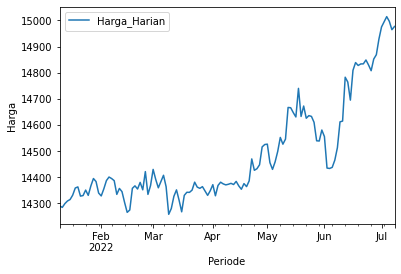

In [20]:
df.set_index('Tanggal').plot(xlabel="Periode", 
                             ylabel="Harga")

<AxesSubplot:xlabel='Periode', ylabel='Rate (%)'>

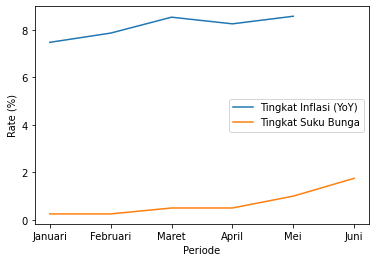

In [21]:
 rate.set_index("Bulan").plot(xlabel="Periode", 
                              ylabel="Rate (%)")

Visualisasi Interaktif dengan `plotly`

1. Prepare Packages

In [22]:
import chart_studio.plotly as py
import plotly.express as px
import cufflinks as cf
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

2. Visualization Interactive

### Plot 1

In [23]:
# ============================  Membuat Visualisasi pergerakan nilai tukar ============================================

# Membuat line chart interactive dengan plotly
fig = px.line(df, x='Tanggal', y="Harga_Harian", markers=True,
              title = "<b>Pergerakan Nilai Tukar USD-IDR</b><br>10 Jan 2022 - 8 Jul 2022")


# Menambahkan anotasi harga Tertinggi
fig.add_annotation(x="2022-07-05", y=15014.65,
            text="Tertinggi",
            showarrow=True,
            arrowhead=1,
            font=dict(
                family="Lucida bright",
                size=15,
                color="#C0C0C0"),
            align="center",
            bordercolor="#c7c7c7",
            borderwidth=2,
            borderpad=4,
            bgcolor="#228B22",
            opacity=1)

# Menambahkan anotasi harga Terendah
fig.add_annotation(x="2022-03-09", y=14257.95,
            text="Terendah",
            showarrow=True,
            arrowhead=1,
            font=dict(
                family="Lucida bright",
                size=15,
                color="#C0C0C0"),
            align="center",   
            ax=30,
            ay=40,
            bordercolor="#c7c7c7",
            borderwidth=2,
            borderpad=4,
            bgcolor="#800000",
            opacity=1)
fig.show()

### Plot 2

In [25]:
# ============================  Membuat Visualisasi pergerakan inflasi dan suku bunga ======================================

vis = px.line(df_1, x='Bulan', y='rate (%)', color='Jenis', markers=True,
              title = "<b>Pergerakan Tingkat Inflasi dan Suku Bunga Amerika Serikat</b><br>Jan - Jun")

vis.show()

---

## Finishing This Notebook with Your Analysis and Conclusion

#### 1. Analysis 

>Kita menyadari pergerakan nilai tukar rupiah terhadap dolar AS cenderung ditentukan oleh banyak faktor makroekonomi dan mikroekonomi, termasuk gejolak domestik maupun luar negeri. Nilai tukar mata uang suatu negara sangat dipengaruhi oleh berbagai hal seperti kondisi pertumbuhan ekonomi, kestabilan politik, perdagangan luar negeri, kebijakan negara lain dan masih banyak lagi. Oleh karena itu, pada kesempatan kali ini saya ingin mengulas hanya dari salah satu faktor saja yaitu tingkat inflasi dan suku bunga the Fed (faktor kebijakan negara lain). 

> Kita mengetahui pada Februari 2022 kemarin Rusia melakukan invasi ke Ukraina. Pada mulanya belum terlalu berdampak ke ekonomi amerika serikat. Namun seiring waktu perang tersebut berdampak bagi perekonomian global termasuk AS karena Rusia dan Ukraina merupakan negara penghasil produk pangan global. Hal ini pun selaras terlihat pada plot 2, cenderung tingkat inflasi AS selalu tinggi di atas 7% dari Januari-Mei, padahal target inflasi yang ditetapkan oleh the Fed (Bank Sentral AS) hanya 2%. Tingkat inflasi yang tinggi ini membuat the Fed mesti melakukan solusi, seperti kebijakan pengetatan moneter (*tight monetary policy*) alias kebijakan moneter kontraktif. Kebijakan ini sederhananya adalah bank sentral mendorong agar uang yang beredar di masyarakat berkurang sehingga harapannya daya beli masyarakat berkurang sehingga tingkat inflasi dapat ditekan menurun. Contoh kebijakan ini adalah menaikkan suku bunga, dengan menaikkan suku bunga harapannya masyarakat cenderung menabung dan mengurangi konsumsi kredit karena suku bunga pinjaman ikut naik. Dengan adanya kenaikan suku bunga ini cenderung mendorong investor dan spekulan untuk menarik uang mereka dari Indonesia (alias menukarkan mata uang rupiah dengan dolar AS) karena terdapat benefit bunga yang menarik (suku bunga meningkat) sehingga akan menekan nilai rupiah yang semakin anjlok.

>Uraian di atas tergambar dari plot yang telah dihasilkan. Pada 1 terlihat selama awal Januari hingga akhir April cenderung pergerakan nilai tukar rupiah terhadap dolar US cenderung memiliki range trend yang tidak begitu signifikan. Namun,
ketika bank sentral AS mulai melakukan tindakan untuk mengatasi inflasi dengan menaikan suku bunga 100% dari 0.5% menjadi 1% (April-Mei) kemudian menaikan lagi 75% dari 1% menjadi 1.75% (Mei-Juni) menimbulkan nilai tukar rupiah berubah melemah signifikan terhadap dolar AS dan pada 5 Juli 2022 kemarin mencapai Rp. 15014.65 per 1 $ alias nilai tertinggi diantara Januari hingga Juli 2022.

#### 2. Conclusion

>Pada uraian materi dan code di atas kita telah melihat bagaimana melakukan *web scrapping* dengan bantuan **BeautifulSoup**. Dengan bantuan **BeautifulSoup** dan terkhusus pemrograman cenderung kita bisa lebih mudah mendapatkan informasi dari internet tanpa melakukannya secara manual. Kemudian setelah mendapatkan informasi tersebut kita dapat menyimpannya dalam dataframe. Selanjutnya kita susun dan bersihkan (*data wrangling and data cleansing*) sehingga nantinya dapat diolah dengan melakukan visualisasi melalui `matplotlib` dan `plotly`. Selain itu, kita juga telah menganalisis dari salah satu faktor yang mempengaruhi pergerakan nilai tukar rupiah terhadap dolar AS.

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.